In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import torch
import math

In [3]:
import astropy.coordinates as coord
import astropy.units as u

In [4]:
data = pd.read_csv('rgb_rc_gaia.csv')

In [5]:
#in torch 

l = torch.from_numpy(data['l'].values)
b = torch.from_numpy(data['b'].values)
dist = torch.from_numpy(data['distance'].values)
pi = torch.tensor(math.pi)

X = dist*torch.cos(l*pi/180.)*torch.cos(b*pi/180.) - coord.Galactocentric().galcen_distance.value
Y = dist*torch.sin(l*pi/180.)*torch.cos(b*pi/180.)
Z = dist*torch.sin(b*pi/180.) #+ 0.0208

In [6]:
#in numpy
#X = data['distance']*np.cos(data['l']*np.pi/180.)*np.cos(data['b']*np.pi/180.) - coord.Galactocentric().galcen_distance.value
#Y = data['distance']*np.sin(data['l']*np.pi/180.)*np.cos(data['b']*np.pi/180.)
#Z = data['distance']*np.sin(data['b']*np.pi/180.) #+ 0.0208

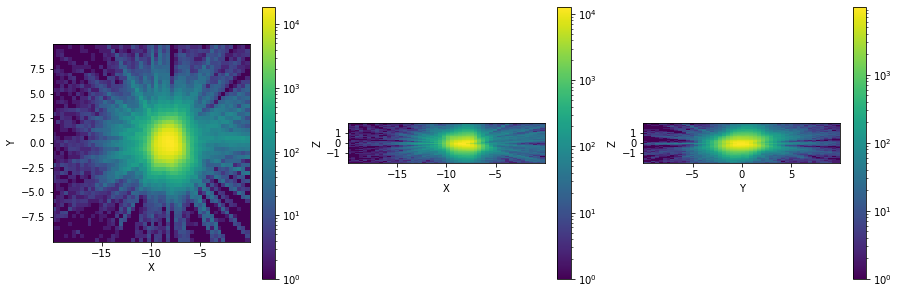

In [7]:
insample = (X < 0) & (X > -20) & (Y > -10) & (Y < 10) & (np.abs(Z) < 2)
fig, ax = plt.subplots(1,3, figsize=(15,5))
H, xe, ye = np.histogram2d(X[insample].detach().numpy(), Y[insample].detach().numpy(), bins=50)
im = ax[0].pcolormesh(xe, ye, H.T+1, norm=mpl.colors.LogNorm())
fig.colorbar(im, ax=ax[0])
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_aspect('equal')


H, xe, ye = np.histogram2d(X[insample].detach().numpy(), Z[insample].detach().numpy(), bins=50)
im = ax[1].pcolormesh(xe, ye, H.T+1, norm=mpl.colors.LogNorm())
fig.colorbar(im, ax=ax[1])
ax[1].set_xlabel('X')
ax[1].set_ylabel('Z')
ax[1].set_aspect('equal')

H, xe, ye = np.histogram2d(Y[insample].detach().numpy(), Z[insample].detach().numpy(), bins=50)
im = ax[2].pcolormesh(xe, ye, H.T+1, norm=mpl.colors.LogNorm())
fig.colorbar(im, ax=ax[2])
ax[2].set_xlabel('Y')
ax[2].set_ylabel('Z')
ax[2].set_aspect('equal')

In [8]:
c = coord.Galactic(l=data['l'].values*u.deg, b=data['b'].values*u.deg, distance=data['distance'].values*u.kpc)
cg = c.transform_to(coord.Galactocentric)

(-2.0, 2.0)

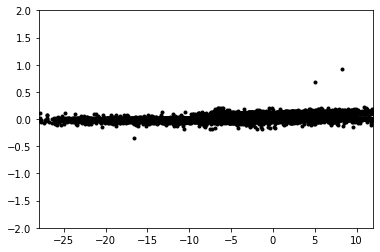

In [18]:
plt.plot(cg.x.value, X - cg.x.value, 'ko', markersize=3)
plt.xlim(-28, 12)
plt.ylim(-2, 2)

(-2.0, 2.0)

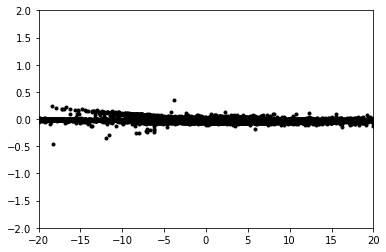

In [17]:
plt.plot(cg.z.value, Z - cg.z.value, 'ko', markersize=3)
plt.xlim(-20, 20)
plt.ylim(-2, 2)

In [ ]:
plt.plot(cg.y.value, Y - cg.y.value, 'ko', markersize=3)
plt.xlim(-20, 20)
plt.ylim(-2, 2)

In [12]:
insample = (cg.x.value < 0) & (cg.x.value > -20) & (cg.y.value > -10) & (cg.y.value < 10) & (np.abs(cg.z.value) < 2)

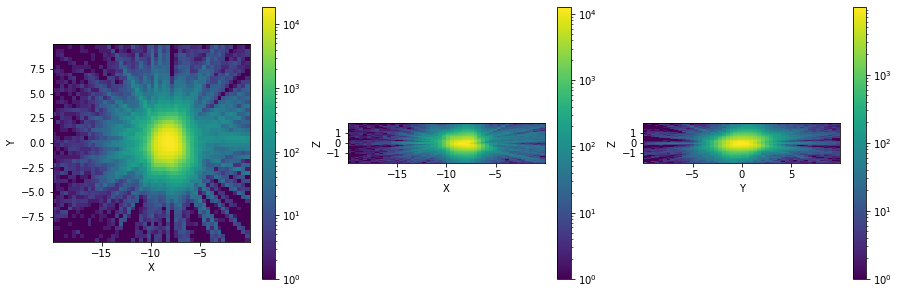

In [13]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
H, xe, ye = np.histogram2d(cg.x[insample].value, cg.y[insample].value, bins=50)
im = ax[0].pcolormesh(xe, ye, H.T+1, norm=mpl.colors.LogNorm())
fig.colorbar(im, ax=ax[0])
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_aspect('equal')


H, xe, ye = np.histogram2d(cg.x[insample].value, cg.z[insample].value, bins=50)
im = ax[1].pcolormesh(xe, ye, H.T+1, norm=mpl.colors.LogNorm())
fig.colorbar(im, ax=ax[1])
ax[1].set_xlabel('X')
ax[1].set_ylabel('Z')
ax[1].set_aspect('equal')

H, xe, ye = np.histogram2d(cg.y[insample].value, cg.z[insample].value, bins=50)
im = ax[2].pcolormesh(xe, ye, H.T+1, norm=mpl.colors.LogNorm())
fig.colorbar(im, ax=ax[2])
ax[2].set_xlabel('Y')
ax[2].set_ylabel('Z')
ax[2].set_aspect('equal')